In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

conn= mysql.connector.connect(
    host='localhost',
    user='root',
    password='123456789',
    database='sales_data'
)
cursor = conn.cursor()

In [10]:
query="""SELECT * FROM sales"""
df=pd.read_sql_query(query,conn)
print(df)

    OrderDate   Region  Manager   SalesMan          Item  Units  Unit_price  \
0   06-Jan-18     East   Martha  Alexander    Television     95      1198.0   
1   23-Jan-18  Central  Hermann     Shelli  Home Theater     50       500.0   
2   09-Feb-18  Central  Hermann       Luis    Television     36      1198.0   
3   26-Feb-18  Central  Timothy      David    Cell Phone     27       225.0   
4   15-Mar-18     West  Timothy    Stephen    Television     56      1198.0   
5   01-Apr-18     East   Martha  Alexander  Home Theater     60       500.0   
6   18-Apr-18  Central   Martha     Steven    Television     75      1198.0   
7   05-May-18  Central  Hermann       Luis    Television     90      1198.0   
8   22-May-18     West  Douglas    Michael    Television     32      1198.0   
9   08-Jun-18     East   Martha  Alexander  Home Theater     60       500.0   
10  25-Jun-18  Central  Hermann      Sigal    Television     90      1198.0   
11  12-Jul-18     East   Martha      Diana  Home The

In [11]:
query="""SELECT distinct SalesMan FROM sales"""
df=pd.read_sql_query(query,conn)
print(df)

     SalesMan
0   Alexander
1      Shelli
2        Luis
3       David
4     Stephen
5      Steven
6     Michael
7       Sigal
8       Diana
9       Karen
10       John


           Item   Revenue
0    Television  857768.0
1  Home Theater  361000.0
2    Cell Phone   62550.0
3          Desk    1250.0
4   Video Games   23107.5


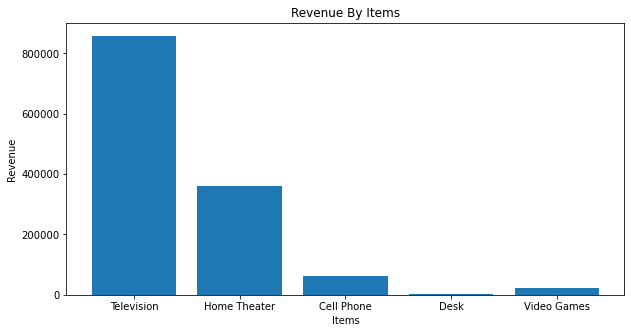

In [27]:
query="""SELECT Item, SUM(Units*Unit_price) AS Revenue
         FROM sales
         GROUP BY Item"""
df=pd.read_sql_query(query,conn)
print(df)

plt.figure(figsize=(10,5))
plt.bar(df['Item'],df['Revenue'])
plt.xticks()
plt.xlabel('Items')
plt.ylabel('Revenue')
plt.title('Revenue By Items')
plt.savefig("sales.chart.png")
plt.show()

           Item  total_qty
0    Television      716.0
1  Home Theater      722.0
2    Cell Phone      278.0
3          Desk       10.0
4   Video Games      395.0


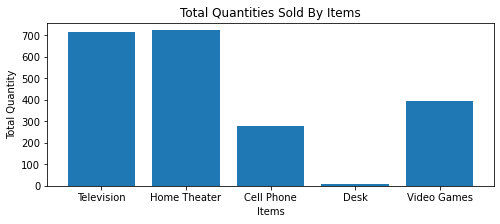

In [18]:
query="""SELECT Item, SUM(Units) AS total_qty
         FROM sales
         GROUP BY Item"""
df=pd.read_sql_query(query,conn)
print(df)

plt.figure(figsize=(8,3))
plt.bar(df['Item'],df['total_qty'])
plt.xticks()
plt.xlabel('Items')
plt.ylabel('Total Quantity')
plt.title('Total Quantities Sold By Items')
plt.show()

    Region  total_sales
0  Central     829769.5
1     East     321007.0
2     West     154899.0


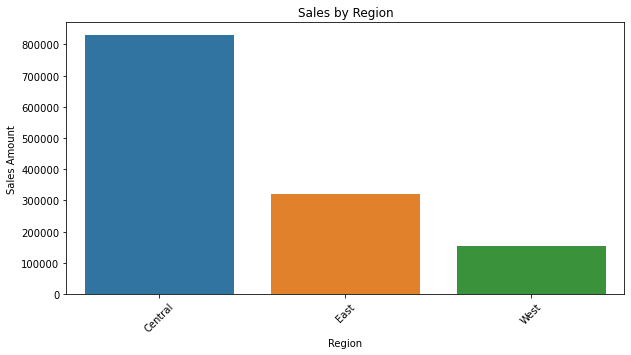

In [13]:
query="""SELECT Region, SUM(Sale_amt) AS total_sales
         FROM sales
         GROUP BY Region
         ORDER BY total_sales DESC"""
df=pd.read_sql_query(query,conn)
print(df)

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Region', y='total_sales')
plt.xticks(rotation=45)
plt.ylabel('Sales Amount')
plt.title('Sales by Region')
plt.show()

   Manager  total_sales
0  Timothy     229018.0
1  Douglas     239056.0
2  Hermann     365108.5
3   Martha     472493.0


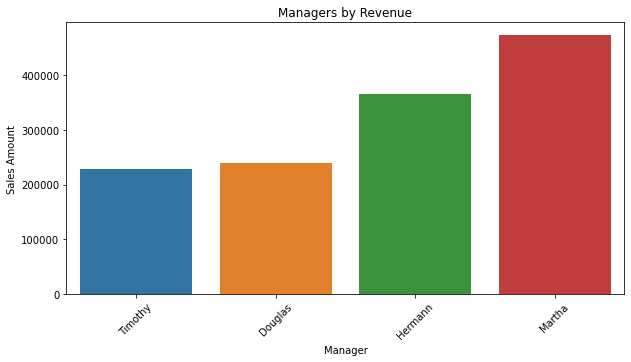

In [14]:
query="""SELECT Manager, SUM(Sale_amt) AS total_sales
         FROM sales
         GROUP BY Manager
         ORDER BY total_sales"""
df=pd.read_sql_query(query,conn)
print(df)

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Manager', y='total_sales')
plt.xticks(rotation=45)
plt.ylabel('Sales Amount')
plt.title('Managers by Revenue')
plt.show()

    SalesMan  total_sales
0  Alexander     236703.0
1       Luis     206373.0
2     Steven     199690.0
3      David     140955.0
4      Sigal     125037.5


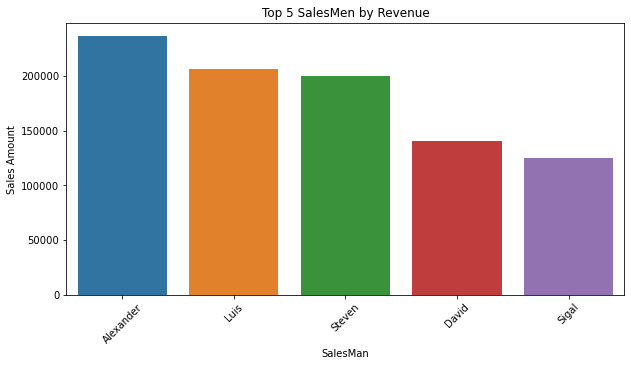

In [15]:
query="""SELECT SalesMan, SUM(Sale_amt) AS total_sales
         FROM sales
         GROUP BY SalesMan
         ORDER BY total_sales DESC LIMIT 5"""
df=pd.read_sql_query(query,conn)
print(df)

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='SalesMan', y='total_sales')
plt.xticks(rotation=45)
plt.ylabel('Sales Amount')
plt.title('Top 5 SalesMen by Revenue')
plt.show()

    Region  Manager  total_sales
0  Central  Hermann     365108.5
1  Central   Martha     199690.0
2  Central  Timothy     140955.0
3  Central  Douglas     124016.0
4     East   Martha     272803.0
5     East  Douglas      48204.0
6     West  Timothy      88063.0
7     West  Douglas      66836.0


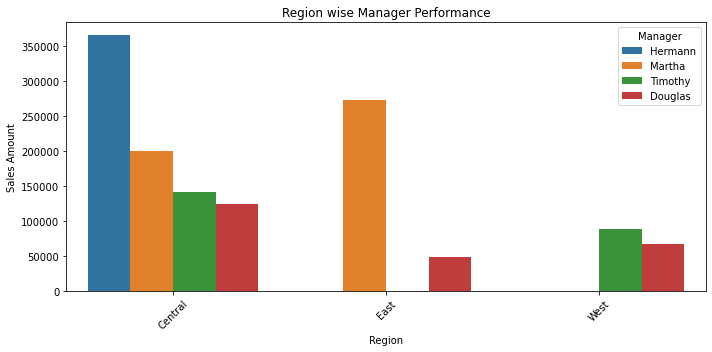

In [16]:
query="""SELECT Region,Manager, SUM(Sale_amt) AS total_sales
         FROM sales
         GROUP BY Region, Manager
         ORDER BY Region, total_sales DESC"""
df=pd.read_sql_query(query,conn)
print(df)

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Region', y='total_sales', hue="Manager")
plt.xticks(rotation=45)
plt.ylabel('Sales Amount')
plt.title('Region wise Manager Performance')
plt.tight_layout()
plt.show()

In [28]:
conn.close()